<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy
numpy.random.bit_generator = numpy.random._bit_generator

import visvis as vv
import matplotlib.pyplot as plt
import sys
import matplotlib.image as mpimg
import os
from NomeroffNet import  filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing

Using TensorFlow backend.


Preparing the [nomeroff-net](https://github.com/ria-com/nomeroff-net) solution

In [2]:
nnet = Detector('./', './logs')
nnet.loadModel('latest')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






In [3]:
rectDetector = RectDetector()
optionsDetector = OptionsDetector()
optionsDetector.load("latest")
textDetector = TextDetector.get_static_module("ru")()
textDetector.load("latest")


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






In [4]:
def detectCarNumber(imgPath: str) -> str:
    img = mpimg.imread(imgPath)
    plt.figure(figsize=(16, 9))
    plt.imshow(img)
    NP = nnet.detect([img])

    cvImgMasks = filters.cv_img_mask(NP)

    arrPoints = rectDetector.detect(cvImgMasks)
    zones = rectDetector.get_cv_zonesBGR(img, arrPoints)

    regionIds, stateIds, _c = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones)
    textArr = textPostprocessing(textArr, regionNames)
    
    return textArr

Result example

['A823TC50']

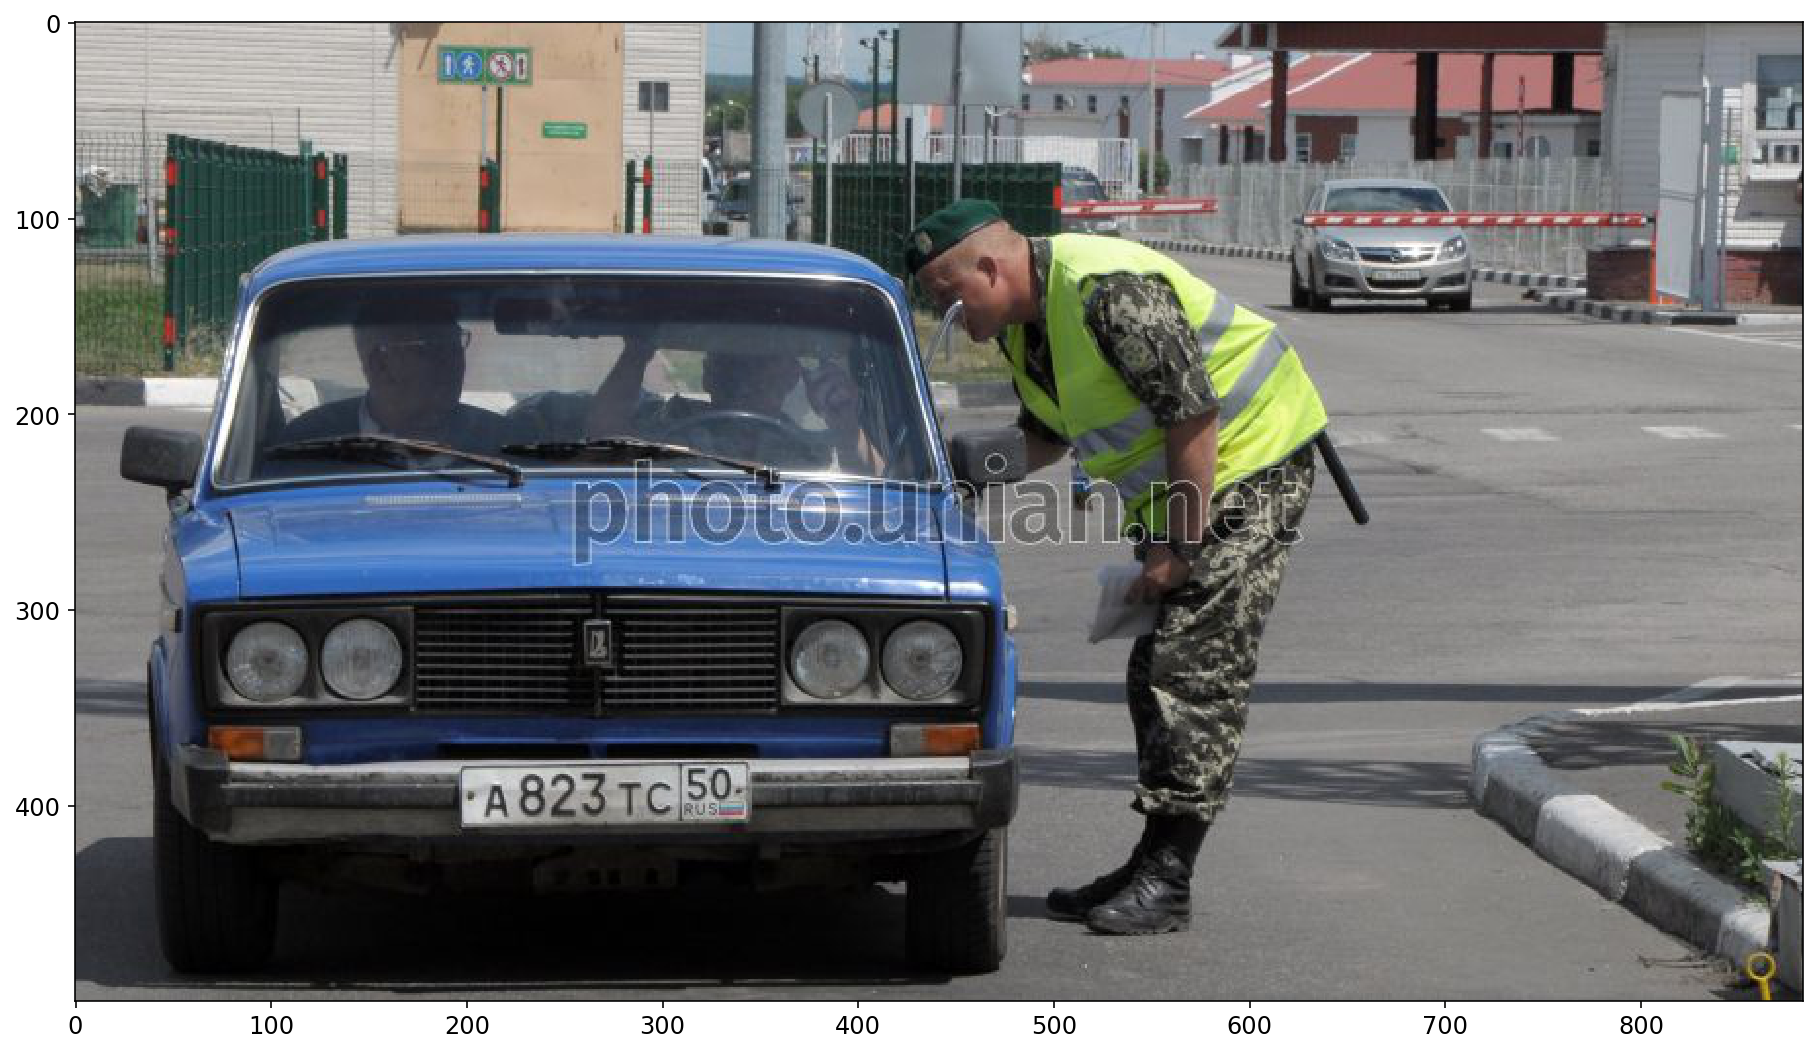

In [5]:
detectCarNumber('./images/2.jpg')